# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Import Dataset

In [2]:
df = pd.read_csv('dataset/Default Dataset Voltage to Capacity (Revisi 1).csv')

In [3]:
df['Voltage'] = df['Voltage'] * 16

# Checking Dataset

In [4]:
df

,Capacity,Voltage
0,99.885288,55.374258
1,99.749525,55.116456
2,99.545789,54.794270
3,99.342099,54.439825
4,99.206381,54.149765
...,...,...
446,0.338026,1.695962
447,0.270465,1.341254
448,0.225592,0.986502
449,0.271700,0.470284


<Axes: xlabel='Voltage', ylabel='Capacity'>

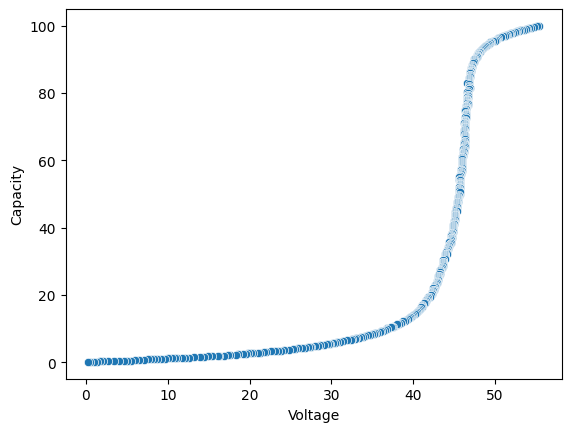

In [5]:
sns.scatterplot(x=df['Voltage'], y=df['Capacity'])

# Split Feature and Target

In [6]:
X = df[['Voltage']] #Feature
y = df['Capacity'] #Target

# Check Correlation

In [7]:
cor, _ = pearsonr(df['Voltage'].values, df['Capacity'].values)

print("Correlation between feature and target:", cor)

Correlation between feature and target: 0.7549189446054873


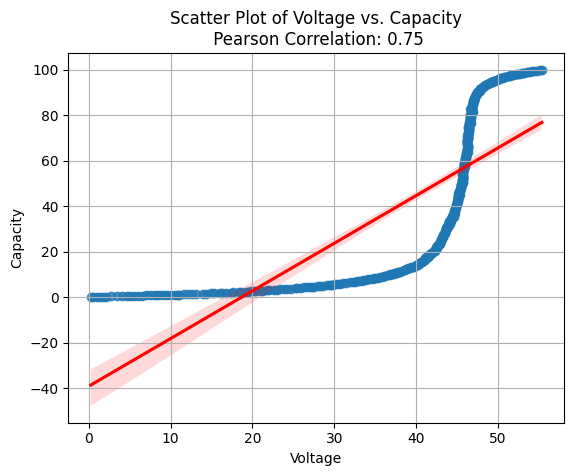

In [8]:
sns.regplot(x='Voltage', y='Capacity', data=df, line_kws={'color': 'red'})
plt.title(f'Scatter Plot of Voltage vs. Capacity\n Pearson Correlation: {cor:.2f}')
plt.xlabel('Voltage')
plt.ylabel('Capacity')
plt.grid(True)
plt.show()

# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [10]:
model_svr = SVR(kernel='poly', degree=4)

In [11]:
model_svr.fit(X_train, y_train)

SVR(degree=4, kernel='poly')

In [12]:
y_pred = model_svr.predict(X_test)

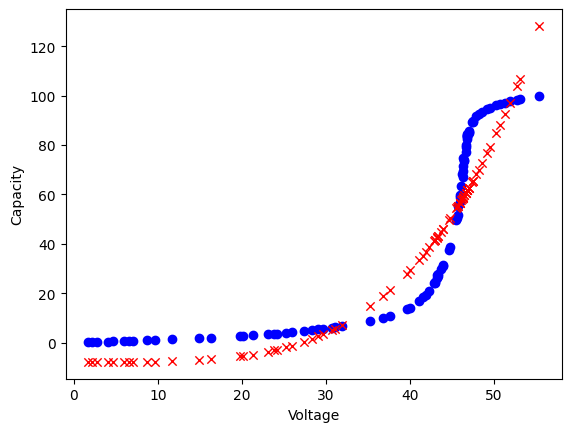

In [13]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', linewidths=1)
plt.xlabel('Voltage')
plt.ylabel('Capacity')
plt.show()

# Model Evaluation

In [14]:
accuracy = model_svr.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8557761372729238


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 12.001953012486004
Mean Squared Error: 192.95826837115257
Root Mean Squared Error: 13.890941954063178
R-squared: 0.8557761372729238
